In [249]:
import numpy as np
import matplotlib.pyplot as plt

# generate SEM
import sys
sys.path.append("..")

from notears.notears.notears import linear
from notears.notears.notears import utils
import helper.helper as h
import helper.methods as m

from importlib import reload  # Python 3.4+

In [305]:
def KOMP_Psi_K(Psi, K, max_coefs = 1e10, tol = 0.0, verbose = False, output = False, normalize = True, gamma = 1e-3):
    """Do Kernel OMP on X, Y."""
    
    # get dimensions
    n = np.shape(Psi)[0]

    # initialize Lambda, idx, betas
    Lambda, idx, betas = [[] for _ in range(n)], [], np.zeros((n, n))

    # compute norms if we want to normalize
    norms = [1] * n # initialize as harmless 1 array
    if normalize: norms = [np.linalg.norm(x) for x in X.T]
    
    # for each possible coefficient
    for i in range(n ** 2):    
    
        # compute gains
        gains = np.abs([(k - betas.T @ Psi[i, :]) / norms[i] for i, k in enumerate(K)])
        
        # stopping criterion
        if np.round(gains, 5).max() <= tol: 
            print("Break")
            break
    
        # append best atom to Lambda
        # if tie, pick the one that minimizes residual
        row, col = np.argmax(gains) // n, np.argmax(gains) % n
        Lambda[col].append(row)
    
        # check if we have a DAG, not super efficient
        if True: # h.is_dag(Lambda_to_adj(Lambda)): 
            # update only column col, use indices of 
            idx = Lambda[col]
            Psi_F = Psi[np.array(idx)[:, None], np.array(idx)[None, :]]
        
            # update betas
            betas[np.array(idx)[:, None], col] = np.linalg.inv(Psi_F) @ K[np.array(idx)[:, None], col]
    
        else:
            # append forbidden entry to forbidden list
            F.append(int(np.argmax(gains)))
            # remove coefficient from Lambda
            Lambda[col].remove(row)
    
        # print info if verbose
        if verbose:
            print(f"Iteration {i + 1}.\n")
            print(f"Gains:\n{np.round(gains, 3)}.\n")
            print(f"Beta_{i + 1}:\n{np.round(betas, 3)}.\n")
            print(f"Residual Squared: {np.round([Theta[i] - Psi[:, i] @ betas[:, i] for i in range(n)], 32)}.\n\n")

    return betas 

Instead of a linear system like $$Y = XW,$$ we can also have non-linear relations such as $$\Phi(Y) = \Phi(X) W.$$ This $\Phi$ can be any function that maps features to another feature space. Then, we can do OMP without explicitly computing all the values for $\Phi(Y)$ and $\Phi(X)$. An example is a quadtratic Kernel, such as $$K(x, y) = (x^Ty)^2.$$ 

If our data has been generated according to this feature space, then.

We can also create our "own" Kernels, such as $$K(x, y) = (x, x^2)^T(y, y^2).$$ Then, we can again do some cool stuff.

In [385]:
def K_2(x, y):
    return np.dot(np.append(x, x ** 2).T, np.append(y, y ** 2))

In [404]:
def get_Psi(X, K):
    n = np.shape(X)[0]
    
    Psi = np.zeros((n, n))
    
    for i, x_1 in enumerate(X):
        for j, x_2 in enumerate(X):
            Psi[i][j] = K(x_1, x_2)
    
    return Psi

def get_K(X, Y_phi, _K):
    
    n = np.shape(X)[0]
    K = np.zeros((n, n))
    
    for i, x in enumerate(X):
        for j, y_phi in enumerate(Y_phi):
            K[i][j] = np.dot(np.append(x, x ** 2).T, y_phi)
    
    return K

def get_K2(X, Y, _K):
    
    n = np.shape(X)[0]
    K = np.zeros((n, n))
    
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            K[i][j] = _K(x, y)
    
    return K

n, T = 2, 10
W = np.random.rand(n, n)
W_inv = np.linalg.inv(W)
# W = np.identity(n)
print(W)
X = np.array(range(n * T)).reshape(n, T)

Y_phi = (np.hstack((X, X ** 2)).T @ W).T
Y = (Y_phi.T).T

Psi = get_Psi(X, K_2)
print(Psi) 

K = get_K(X, Y_phi, K_2)
print(K)

K2 = get_K2(X, Y[:, :T], K_2)
print(K2)

KOMP_Psi_K(Psi, K)

[[0.69257188 0.4416632 ]
 [0.02387132 0.10168675]]
[[ 15618.  85068.]
 [ 85068. 549518.]]
[[12847.27325902 15548.18427714]
 [72033.4259409  93450.10439858]]
[[ 8794.10670349  7259.74351551]
 [48154.61557177 41212.69138729]]


array([[0.69257188, 0.4416632 ],
       [0.02387132, 0.10168675]])

[[0.51687181 0.47057185]
 [0.66711535 0.36959894]]


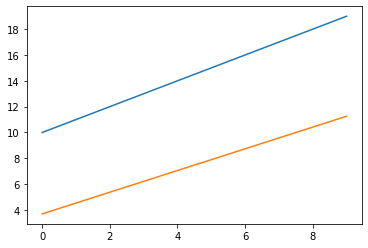

In [373]:
print(W)
plt.plot(X.T[:, 1])
plt.plot(Y_phi.T[:T, 1])

In [253]:
def K_3(x, y):
    return np.dot(np.append(x, x ** 3).T, np.append(y, y ** 3))

In [304]:
def get_Psi(X, K):
    n = np.shape(X)[0]
    
    Psi = np.zeros((n, n))
    
    for i, x_1 in enumerate(X):
        for j, x_2 in enumerate(X):
            Psi[i][j] = K(x_1, x_2)
    
    return Psi

def get_K(X, Y_phi, _K):
    
    n = np.shape(X)[0]
    K = np.zeros((n, n))
    
    for i, x in enumerate(X):
        for j, y_phi in enumerate(Y_phi):
            K[i][j] = np.dot(np.append(x, x ** 3), y_phi)
    
    return K

n, T = 2, 10
W = np.random.rand(n, n)
X = np.random.rand(n, T)

print(W)

Y_phi = (np.hstack((X, X ** 3)).T @ W).T
Y = Y_phi

Psi = get_Psi(X, K_3)
K = get_K(X, Y_phi, K_3)

KOMP_Psi_K(Psi, K)

[[0.67593226 0.67970876]
 [0.47343744 0.12393032]]


array([[0.67593226, 0.67970876],
       [0.47343744, 0.12393032]])

In [140]:
print(np.append(np.array(1), (np.array(2), np.array(3))))

[1 2 3]


In [257]:
def K_32(x, y):
    print(np.dot(np.append(x ** 3, (3 * x ** 2, 3 * x, 1)).T, np.append(y ** 3, (3 * y ** 2, 3 * y, 1))))
    return np.dot(np.append(x ** 3, (3 * x ** 2, 3 * x, 1)).T, np.append(y ** 3, (3 * y ** 2, 3 * y, 1)))

In [256]:
def get_Psi(X, K):
    n = np.shape(X)[0]
    
    Psi = np.zeros((n, n))
    
    for i, x_1 in enumerate(X):
        for j, x_2 in enumerate(X):
            Psi[i][j] = K(x_1, x_2)
    
    return Psi

def get_K(X, Y_phi, _K):
    
    n = np.shape(X)[0]
    K = np.zeros((n, n))
    
    for i, x in enumerate(X):
        for j, y_phi in enumerate(Y_phi):
            K[i][j] = np.dot(np.append(x ** 3, (3 * x ** 2, 3 * x)), y_phi)
    
    return K

n, T = 2, 10
W = np.random.rand(n, n)
X = np.random.rand(n, T)

print(W)

Y_phi = np.append(X ** 3, (3 * X ** 2, 3 * X, 1))


# Y_phi = (np.hstack((X ** 3, 3 * X ** 2, 3 * X, 1)).T @ W).T
Y = Y_phi

print(np.shape(Y_phi))
print(np.shape(X))

Psi = get_Psi(X, K_32)
K = get_K(X, Y_phi, K_32)

KOMP_Psi_K(Psi, K)

[[0.93626953 0.72047331]
 [0.8981431  0.02885889]]
(23,)
(2, 10)
[ 5.94897405  1.74593731  1.68291206 11.46838233  2.54726799  2.60838712
  3.91072752  1.80388293  8.48174929 10.36369731]


ValueError: setting an array element with a sequence.

In [258]:
def K_32(x, y):
    return np.dot(np.append(x ** 3, np.append(3 * x ** 2, np.append(3 * x, 1))).T, np.append(y ** 3, np.append(3 * y ** 2, np.append(3 * y, 1))))

In [295]:
def get_Psi(X, K):
    n = np.shape(X)[0]
    
    Psi = np.zeros((n, n))
    
    for i, x_1 in enumerate(X):
        for j, x_2 in enumerate(X):
            Psi[i][j] = K(x_1, x_2)
    
    return Psi

def get_K(X, Y_phi, _K):
    
    n = np.shape(X)[0]
    K = np.zeros((n, n))
    
    for i, x in enumerate(X):
        for j, y_phi in enumerate(Y_phi):
            K[i][j] = np.dot(np.append(x ** 3, np.append(3 * x ** 2, np.append(3 * x, 1))), y_phi)
    
    return K

def get_K2(X, Y, _K):
    
    n = np.shape(X)[0]
    K = np.zeros((n, n))
    
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            K[i][j] = _K(x, y)
    
    return K

n, T = 2, 10
# W = np.random.rand(n, n)
W = np.identity(n)
X = np.random.rand(n, T)

print(W)
Y_phi = np.zeros((2, 31))
Y_phi[0] = np.append(X[0] ** 3, np.append(3 * X[0] ** 2, np.append(3 * X[0], 1)))
Y_phi[1] = np.append(X[1] ** 3, np.append(3 * X[1] ** 2, np.append(3 * X[1], 1)))
Y_phi = (Y_phi.T @ W).T
# Y = np.cbrt(X + 1)

print(X[0, :T])
Y = np.cbrt(Y_phi[:, :T])

Psi = get_Psi(X, K_32)

K = get_K(X, Y_phi, K_32)
print(K)

K2 = get_K2(X, Y, K_32)
print(K2)

KOMP_Psi_K(Psi, K)

[[1. 0.]
 [0. 1.]]
[0.75131986 0.28778942 0.01644792 0.84738421 0.58149844 0.96184374
 0.08482976 0.29440983 0.88464646 0.17333501]
[[56.57048331 19.01140854]
 [19.01140854 53.83026846]]
[[56.57048331 19.01140854]
 [19.01140854 53.83026846]]
Break


array([[1., 0.],
       [0., 1.]])

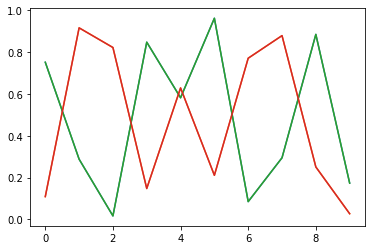

In [303]:
plt.plot(Y.T)
plt.plot(X.T)

#### Relationship between $X$ and $Y$
$$\Phi(Y) = \Phi(X) W$$

$$(Y^3, 3Y^2, 3Y, 1) = (X^3, 3 X^2, 3X, 1) W$$

$$(Y^3, 3Y^2, 3$$

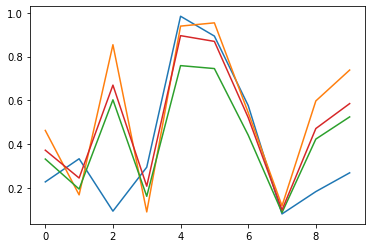

In [265]:
plt.plot(X.T)